In [ ]:
from common.module_functions import *
import numpy as np
import pandas as pd
from sklearn.neighbors import kneighbors_graph

data, X = get_data('common/data/earthquake_data.csv')

adj_matrix = kneighbors_graph(X, n_neighbors = 7, mode='connectivity', include_self=False)


In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_spatial = scaler.fit_transform(data[['x', 'y', 'z']])
X_mag = scaler.fit_transform(data[['mag']])

# Increase alpha to make clusters geographically tighter
alpha = 2.0 
X_combined = np.hstack([X_spatial * alpha, X_mag])

kmeans = KMeans(n_clusters=4, random_state=42)
data['cluster'] = kmeans.fit_predict(X_combined)

data.to_csv('results/earthquake_clusters_spatially_constraied_kmeans.csv', index = False)

In [31]:
data['cluster'].value_counts()

cluster
0    205
2      9
3      6
1      4
Name: count, dtype: int64

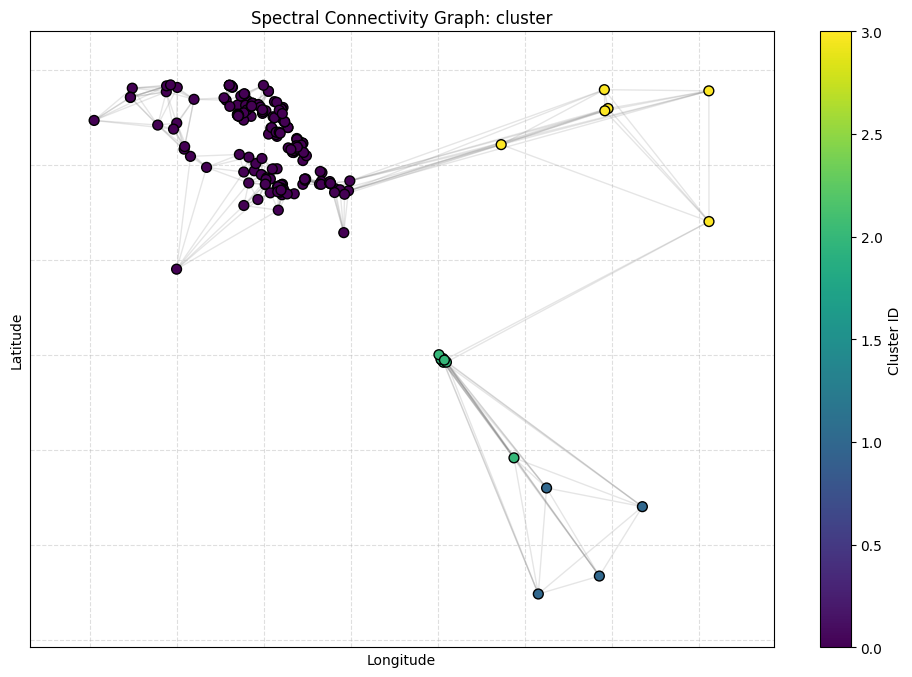

In [33]:
visualize_graph_connectivity(data, adj_matrix, 'cluster')

In [34]:
visualize_3d(data, 'cluster')

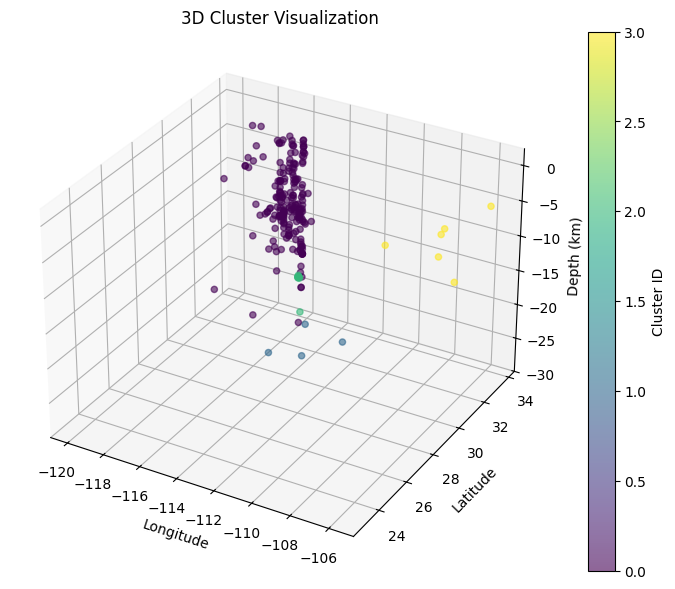

In [35]:
visualize_3d_static(data, cluster_name='cluster')


In [36]:
calculate_sillouette_score(X_combined, 'cluster', data)

Silhouette Score: 0.7410119883578755


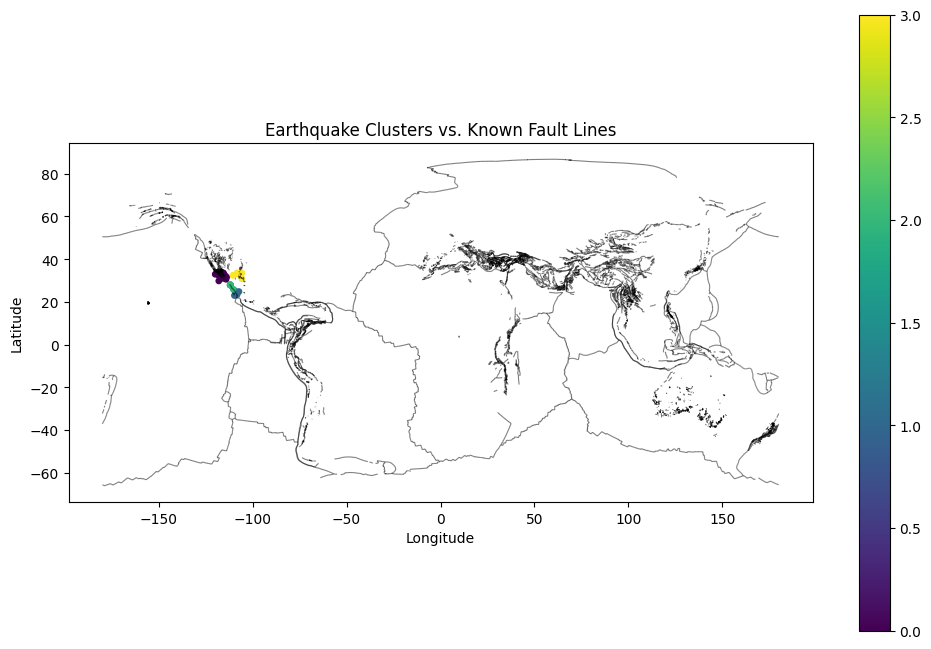

In [37]:
visualize_clusters_on_known_fault_lines(data, crs = "EPSG:4326", cluster_column='cluster')

/var/folders/bz/yzqc11sn1gj3p_f45_fhc_qc0000gn/T/ipykernel_5017/4247735480.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




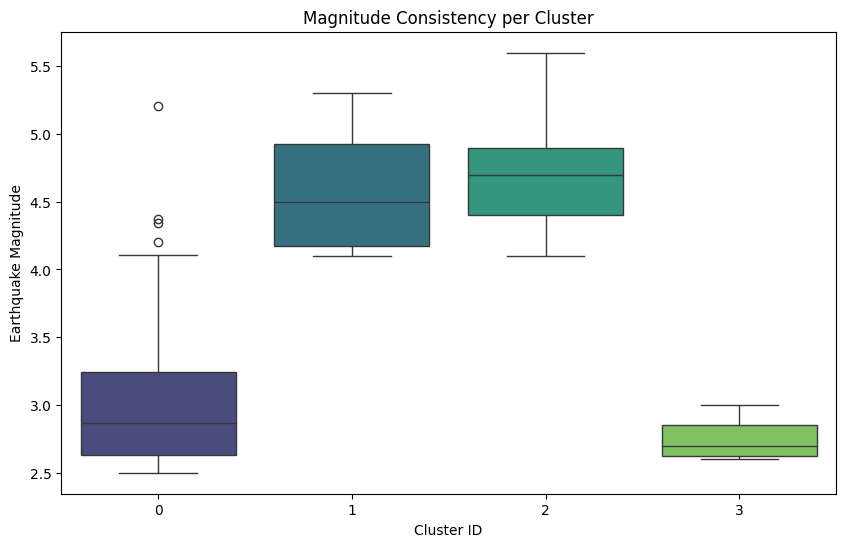

             mean       std  count  coefficient_of_variation
cluster                                                     
0        2.988911  0.446561    205                  0.149406
1        4.600000  0.559762      4                  0.121687
2        4.722222  0.423609      9                  0.089705
3        2.750000  0.164317      6                  0.059752


In [ ]:
box_plot_by_cluster(data, 'cluster', 'mag')